# Proton Training and Validation Modularized

## Dependencies

In [1]:
# !pip3 install swifter
# !pip3 install xgboost
# !pip3 install tqdm
# !pip3 install category_encoders
# !pip3 install joblib
# !pip3 install scikit-plot
# !pip3 install catboost
# !pip3 install RegscorePy
# !pip3 install -U spacy
# !pip3 install gensim
# !pip3 install xlrd
# !pip3 install lightgbm
# !pip3 install hyperopt
# !pip3 install holidays
# !pip3 install textblob
# !pip3 install pydotplus
# !pip3 install graphviz
# !pip3 install imblearn

# Download en_core_web_sm for text analytics

## Main Function

Attempting to import 30 rows of the dataset
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 28 columns and 30 rows

DataFrame Succesfully imported

Index(['ORDERDATE', 'Date', 'PostingDate', 'LAST_GIFTDATE',
       'lastTransactionDate', 'CMP_A_FIRST_I_DATE', 'SchoolName', 'CBSA_DESC',
       'AddressFull', 'DEADCAT', 'toobigsmall', 'AVERAGE_ACCT_AGE', 'Latitude',
       'Longitude', 'LatitudeLongitude', 'PHONE', 'Salary', 'CDOLL10_AVGGIFT',
       'income', 'YearsCoding', 'emp_length', 'CompanySize', 'url',
       'emailaddress', 'NTEECoreCodeName', 'v2', 'JobSearchStatus',
       'ReviewText'],
      dtype='object')

Enter 'quit' to quit
Target Spotted!

Enter 'quit' to quit
Key  Not found in the data
Preview can't be shown!!
Do you think you have Successive Targets based on the current target? If yes, enter the column names below 
in this format separated by commas: col1,col2,col3
No Columns removed
Would you like to remove any other ID,zip Code,Phone Number



thresh2: 1.0625

The final score sheet of 14 selected columns with importances:

                     col_name  scores2   t/f
1             ORDERDATE-today      172  True
8          LAST_GIFTDATE_year      103  True
5    lastTransactionDate_year      101  True
23                YearsCoding      100  True
24           NTEECoreCodeName      100  True
34                         v2      100  True
0             ORDERDATE_month       96  True
2           PostingDate_month       12  True
3           PostingDate-today        7  True
4   lastTransactionDate_month        3  True
6    CMP_A_FIRST_I_DATE-today        2  True
7         LAST_GIFTDATE_month        2  True
11   LatitudeLongitude-Origin        2  True
28                CompanySize        2  True

25 columns are eliminated during Feature Selection which are:
{'PostingDate_year', 'ORDERDATE_Holiday', 'lastTransactionDate_Holiday', 'url_domain', 'SchoolName', 'LAST_GIFTDATE_Holiday', 'PostingDate_Holiday', 'CMP_A_FIRST_I_DATE_month', 'C

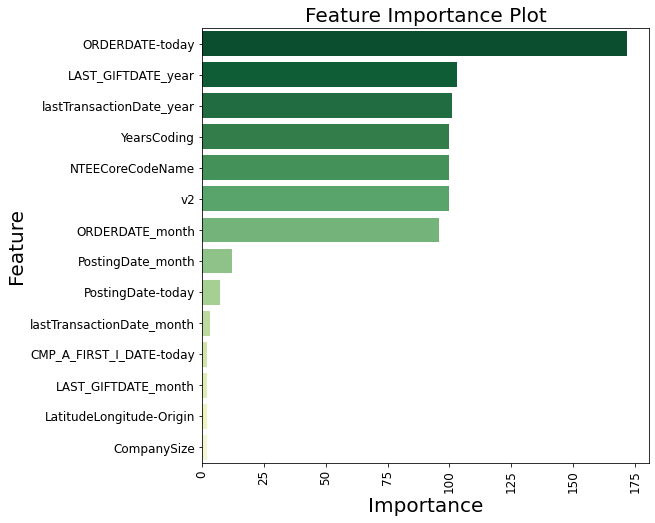

Feature Selection Plot Time taken : 0.6567549705505371
(4058, 14)
(4058,)

 #### SCALING ####
 #### SCALING DONE ####
(4058, 14)
(4058,)

 #### POWER TRANSFORMATIONS ####
 #### POWER TRANSFORMATIONS DONE ####
(4058, 14)
(4058,)

 #### Printing Sample Equation of the DATA ####
LABEL ENCODED FOR SAMPLE EQUATION


LINEAR REGRESSION EQUATION:


Predicted value = 2947.1859463873766*ORDERDATE_month + 7445.295818310001*lastTransactionDate_month + 14.636329144103911*CMP_A_FIRST_I_DATE-today + 4149.787324576668*LAST_GIFTDATE_month + -2589.8819705803144*LAST_GIFTDATE_year + -5356.370398619953*YearsCoding + -5150.9800108413165*NTEECoreCodeName + 2213.2159376756667*v2 + 5239166.2918724865

R squared = 0.394
(The closer R squared is to 1, the better the model is)

Where the columns are encoded like this:

+------------------+-----------------------+
| YearsCoding      |   YearsCoding encoded |
|------------------+-----------------------|
| 0-2 years        |                     0 |
| 12-14 years   

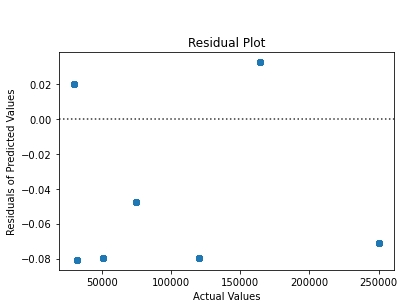

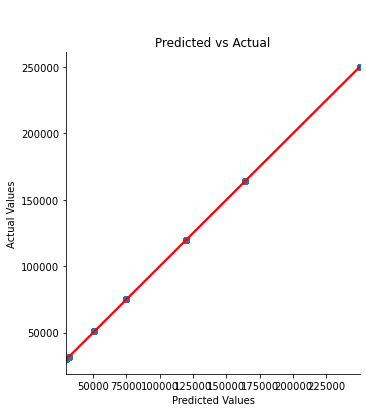


Distribution of Mean of Actual and Predicted Values by Deciles:
+----------+--------------------+-----------------------+
|   Decile |   Actualvalue_mean |   Predictedvalue_mean |
|----------+--------------------+-----------------------|
|        1 |           250000   |              249992   |
|        2 |           182736   |              182731   |
|        3 |           164180   |              164176   |
|        4 |           164180   |              164176   |
|        5 |           164180   |              164176   |
|        6 |           164180   |              164176   |
|        7 |           164180   |              164176   |
|        8 |           102162   |              102161   |
|        9 |            46369.4 |               46370.3 |
|       10 |            30000   |               30001.7 |
+----------+--------------------+-----------------------+
164176.29 is present in 58% of the Testing Preview
30001.737 is present in 12% of the Testing Preview
249992.109 is present

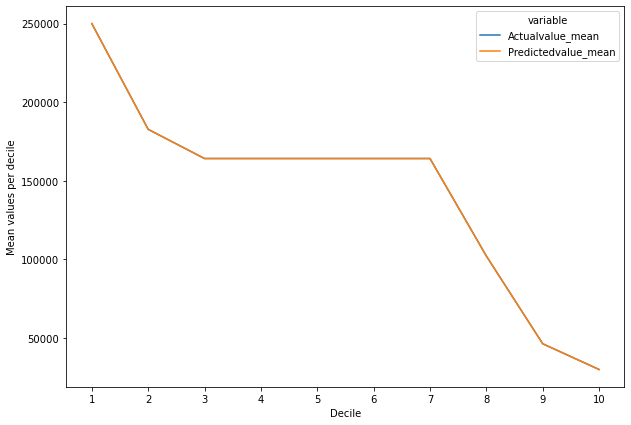

In [2]:
from userInputs import *
from INIT import *
from score import *
from all_other_functions import targetAnalysis
import time
import pandas as pd
import numpy as np
import swifter
import joblib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from engineerings import numeric_engineering
def main():
    '''
    PROTON MAIN FUNCTION
    '''
    spinnerBool = False
    path = input('Enter the path here : ')
    error = False
    if path:
        print("Attempting to import 30 rows of the dataset")
        df,csvPath = importFile(path,nrows=30)
        df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
        df = dataHandler(df) # If first few rows contains unnecessary info
        info = getUserInput(df)
        if not info:
            error = True
    else:
        df = None
        print('\nInitial Import Failed, Quitting Process\n')
        info = None
        error = True

    te = time.time()
    try:
        if info:
            spinnerBool = True
            ################## TRAINING INIT ##################
            if csvPath:
                path = 'SheetSheetSheet.csv'
            df,_ = importFile(path,nrows=None)
            df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
            df = dataHandler(df) # If first few rows contains unnecessary info
            tts = time.time()
            if isinstance(df,pd.DataFrame):
                target = info['target']
                print("###Performing Initial Numeric Engineering for Capping Purposes###")
                dfsamp = df.sample(n=1000,random_state=1) if len(df)>1000 else df.copy()
                dfsamp = numeric_engineering(dfsamp)
                dfsamp = dfsamp.dropna(axis=0,subset=[target])
                print("###Estimating the type of target###")
                class_or_Reg = targetAnalysis(dfsamp[target])                    
                if class_or_Reg == 'Classification':
                    if len(df) >1000000:
                        df_train, _ = train_test_split(df, train_size=1000000,random_state=1, stratify=df[target])
                        print("Dataset size has been capped to 1 million rows for better performance")
                        print("Length of the dataset is now",len(df_train))
                        init_info,validation = INIT(df_train,info)
                    else:
                        print("Dataset has not been capped")
                        print("Length of the dataset is same as original",len(df))
                        init_info,validation = INIT(df,info)
                elif class_or_Reg == 'Regression':
                    dfr = df.sample(n=1000000, random_state=1) if len(df)>1000000 else df.copy()
                    print("Dataset size has been capped to 1 million rows for better performance")
                    print("Length of the dataset is now",len(dfr))
                    init_info,validation = INIT(dfr,info)
                elif class_or_Reg is None:
                    init_info,validation = None,None
            else:
                init_info,validation = None,None
            tte = time.time()
            print('\n TOTAL TRAINING DATA CLEANING AND PLOTS : {}'.format(tte-tts))
            ################## TRAINING INIT ##################

            if isinstance(validation,pd.DataFrame):
                ################## VALIDATION AND PREDICTION ##################
                score(validation,init_info,validation=True)
                ################## VALIDATION AND PREDICTION ##################
                print('\n\t #### CODE EXECUTED SUCCESSFULLY ####')
                print('\n\t #### END ####')
            else:
                print('\n\t #### CODE DID NOT RUN COMPLETELY ####')
            spinnerBool = False
    except KeyboardInterrupt:
        print('QUITTING!')   
        return None
#     except Exception as e:
#         print('Code did not run completely')
#         print('Code ran into an error')
#         print('The error message received is')
#         print(e)
#         return None
    ee = time.time()
    print('\n#### TOTAL TIME TAKEN : {} ####'.format(ee-te))
    return 1

if __name__ == '__main__':
    # Main Function call
    ret = main()

In [3]:
pre = pd.read_csv('preview.csv')
pre.index = np.arange(1,len(pre)+1)

# Set CSS properties for th elements in dataframe
th_prop = [
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'Black'),
    ('border', '0.5px') ,
    ('border', 'solid black'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_prop = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid black'),
    ('color', 'black'),
    ('font-family', 'arial')
  ]

# Set table styles
styls = [
  dict(selector="th", props=th_prop),
  dict(selector="td", props=td_prop),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

# pre.style.set_table_styles(styls).set_caption("Preview of Test Dataset(100 rows) with Predictions and Actual Values")

pre # to display only upto 3 decimal places

,S.No,Actual Values,Predicted Values
1,1935,164180.357,164176.290
2,2872,164180.357,164176.290
3,4714,30000.000,30001.737
4,444,164180.357,164176.290
5,1642,30000.000,30001.737
...,...,...,...
96,4088,250000.000,249992.109
97,1573,164180.357,164176.290
98,3434,164180.357,164176.290
99,329,164180.357,164176.290


In [4]:
# Set CSS properties for th elements in dataframe
th_props = [
    ('background', 'rgb(12, 64, 90)'),
    ('background', 'linear-gradient(0deg, rgba(21, 112, 157) 0%, rgba(12, 64, 90) 120%)'),
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'white'),
    ('border', '0.5px') ,
    ('border', 'solid #0c405a'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid #0c405a')    
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

def color_func(value):           # setting different color for F1 or RMSE column
    if value.name in ['Weighted F1','RMSE']:
        color= '#f7f7ba'
    else:
#         print(value)
        color= '#e8f7fc'
    return ['background-color: %s' %color]*len(value)


MC = pd.read_csv('MC.csv')
if 'Weighted F1' in MC.columns:          # for setting caption
    cap='This table is sorted by F1 Score(Weighted F1), higher the better'
else:
    cap ='This table is sorted by Root Mean Squared Error(RMSE), lower the better'
MC.index = np.arange(1,len(MC)+1)       # adjusting index
if 'Weighted F1' in MC.columns:        #for setting decimal places
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(3)
else:
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(2)
    
mc

,Machine Learning Model,Accuracy%,RMSE,MSE,MAE,BIC,Total time (hh:mm:ss)
1,Ensemble (XGBoost+Light Gradient Boosting Model),100.00%,4.22,17.85,3.73,3308.52,00:00:05
2,XGBoost,100.00%,6.86,46.99,6.26,4387.12,00:00:01
3,Random Forest,98.63%,7538.83,56834004.43,2614.65,19989.41,00:00:02
4,ExtraTrees Regressor,98.49%,7908.13,62538465.01,3170.67,20095.96,00:00:01
5,CatBoost,98.21%,8606.28,74068032.04,3237.95,20284.45,00:00:02
6,Light Gradient Boosting Model,98.21%,8606.28,74068032.04,3237.95,20284.45,00:00:00
7,Ridge Regression,97.80%,9541.06,91031849.19,5537.14,20514.19,00:00:00
8,Linear Regression,97.70%,9748.66,95036330.66,5656.12,20562.14,00:00:00
9,Neural Network,-0.28%,64415.97,4149416608.77,51965.72,24769.12,00:00:01
10,Support Vector Machine,-11.22%,67837.38,4601910789.88,59317.04,24884.43,00:00:00


In [5]:
# joblib.load('XT').min().min()


In [6]:
# joblib.load('Xt').min().min()

In [7]:
# joblib.load('XT').max().max()

In [8]:
# joblib.load('Xt').max().max()

In [9]:
# joblib.load('YT').max()

In [10]:
# joblib.load('Yt').max()

In [11]:
# joblib.load('YT').min()

In [12]:
# joblib.load('Yt').min()

In [13]:
# import pandas as pd
# # df = pd.read_csv('SheetSheetSheet.csv')
